In [1]:
import requests
from bs4 import BeautifulSoup
import time
import random
import math
import sqlite3
import pandas as pd
import numpy as np
import urllib
from lxml import etree
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import sqlite3
import pickle
import math
import numpy as np

In [2]:
all_individuals = pd.read_pickle("individualstats.pkl")
all_teamstats = pd.read_pickle("1920teamstats.pkl")

In [3]:
all_teamstats

G MPTotal FGMadeTotal FGATotal  FGPerc ThreeMadeTotal ThreeATotal  \
0   65.0   15650        2830     5928   0.477            893        2510   
1   64.0   15460        2596     5665   0.458            880        2369   
2   64.0   15485        2634     5735   0.459            794        2190   
3   65.0   15825        2576     5486   0.470            868        2265   
4   65.0   15700        2740     5744   0.477            648        1787   
5   65.0   15675        2651     5701   0.465            742        2052   
6   64.0   15560        2558     5763   0.444            824        2423   
7   65.0   15625        2550     5773   0.442            710        2080   
8   64.0   15435        2682     5821   0.461            788        2117   
9   65.0   15750        2425     5586   0.434            785        2231   
10  65.0   15675        2573     5762   0.447            793        2282   
11  66.0   15965        2638     5896   0.447            631        1872   
12  66.0   15965        2595     5658   0.459            791        2157   
13  67.0   16280        2723     6067   0.449            805        2416   
14  65.0   15725        2619     5715   0.458            727        2070   
15  63.0   15170        2704     5579   0.485            703        1981   
16  64.0   15435        2664     5739   0.464            778        2123   
17  65.0   15750        2719     5778   0.471            707        1977   
18  64.0   15385        2569     5413   0.475            843        2200   
19  64.0   15460        2578     5447   0.473            666        1878   
20  64.0   15435        2632     5803   0.454            986        2832   
21  67.0   16180        2787     6027   0.462           1026        2779   
22  65.0   15625        2779     5913   0.470            710        2019   
23  66.0   15890        2763     5998   0.461            829        2228   
24  64.0   15510        2729     5902   0.462            896        2409   
25  64.0   15510        2583     5622   0.459            808        2219   
26  63.0   15295        2649     5638   0.470            671        1809   
27  65.0   15675        2650     5709   0.464            727        2061   
28  64.0   15560        2586     5865   0.441            853        2540   
29  65.0   15725        2510     5730   0.438            678        2032   

    ThreePerc TwoMadeTotal TwoATotal ...    3PAr OeFGPerc OTOVPerc  ORBPerc  \
0       0.356         1937      3418 ...   0.423    0.553     12.8     20.7   
1       0.371         1716      3296 ...   0.418    0.536     12.8     21.6   
2       0.363         1840      3545 ...   0.382    0.529     12.0     23.9   
3       0.383         1708      3221 ...   0.413    0.549     13.5     20.5   
4       0.363         2092      3957 ...   0.311    0.533     11.9     20.3   
5       0.362         1909      3649 ...   0.360    0.530     12.7     23.7   
6       0.340         1734      3340 ...   0.420    0.515     13.4     23.5   
7       0.341         1840      3693 ...   0.360    0.503     11.4     22.4   
8       0.372         1894      3704 ...   0.364    0.528     12.1     22.0   
9       0.352         1640      3355 ...   0.399    0.504     13.3     23.9   
10      0.348         1780      3480 ...   0.396    0.515     13.7     22.8   
11      0.337         2007      4024 ...   0.318    0.501     12.6     25.8   
12      0.367         1804      3501 ...   0.381    0.529     13.8     22.6   
13      0.333         1918      3651 ...   0.398    0.515     13.8     21.6   
14      0.351         1892      3645 ...   0.362    0.522     14.6     24.6   
15      0.355         2001      3598 ...   0.355    0.548     13.2     24.6   
16      0.366         1886      3616 ...   0.370    0.532     12.7     24.0   
17      0.358         2012      3801 ...   0.342    0.532     12.3     24.7   
18      0.383         1726      3213 ...   0.406    0.552     13.6     21.2   
19      0.355         1912      3569 ...   0.345    0.534     12.3    

In [4]:
all_individuals

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  \
0                Brook Lopez   31  61  60  26.6       4.0    9.4   0.427   
1                D.J. Wilson   23  31   0   9.0       1.3    3.3   0.396   
2           Donte DiVincenzo   23  59  22  23.1       3.5    7.7   0.462   
3              Dragan Bender   22   7   0  13.0       1.4    3.0   0.476   
4               Eric Bledsoe   30  56  56  27.2       5.7   11.8   0.482   
5             Ersan İlyasova   32  56   8  16.0       2.4    5.2   0.472   
6                Frank Mason   25   6   0   8.8       0.8    3.2   0.263   
7                George Hill   33  52   0  21.2       3.4    6.5   0.530   
8      Giannis Antetokounmpo   25  57  57  30.9      10.9   20.0   0.547   
9            Khris Middleton   28  55  52  30.1       7.7   15.5   0.499   
10               Kyle Korver   38  50   0  16.7       2.2    5.2   0.429   
11           Marvin Williams   33  11   0  18.5       1.5    3.5   0.410   
12           Pat Connaughton   27  61   1  18.3       2.0    4.3   0.456   
13               Robin Lopez   31  60   4  14.4       2.3    4.6   0.502   
14            Sterling Brown   24  45   1  14.8       1.8    4.8   0.367   
15    Thanasis Antetokounmpo   27  18   2   5.2       1.1    2.0   0.528   
16           Wesley Matthews   33  62  62  24.7       2.6    6.5   0.397   
17             Chris Boucher   27  55   0  13.2       2.2    4.7   0.458   
18           Dewan Hernandez   23   4   0   2.8       0.3    1.3   0.200   
19             Fred VanVleet   25  48  48  35.8       6.0   14.6   0.409   
20                Kyle Lowry   33  52  52  36.6       5.9   14.3   0.417   
21            Malcolm Miller   26  25   1   5.0       0.3    1.0   0.333   
22                Marc Gasol   35  36  35  27.5       2.8    6.6   0.419   
23               Matt Thomas   25  33   0   9.7       1.6    3.4   0.486   
24             Norman Powell   26  44  23  28.8       5.9   11.7   0.502   
25                OG Anunoby   22  63  62  30.1       4.2    8.4   0.507   
26             Pascal Siakam   25  53  53  35.5       8.7   18.9   0.459   
27             Patrick McCaw   24  37  12  24.5       1.8    4.4   0.414   
28   Rondae Hollis-Jefferson   25  52   5  19.2       2.7    5.7   0.471   
29               Serge Ibaka   30  50  27  27.5       6.5   12.5   0.518   
..                       ...  ...  ..  ..   ...       ...    ...     ...   
497       Karl-Anthony Towns   24  35  35  33.9       9.0   17.8   0.508   
498         Keita Bates-Diop   24  37   0  17.5       2.4    5.6   0.422   
499            Malik Beasley   23  14  14  33.1       7.9   16.6   0.472   
500                 Naz Reid   20  30  11  16.5       3.3    8.1   0.412   
501              Noah Vonleh   24  29   1  12.0       1.6    3.0   0.547   
502         Robert Covington   29  48  47  29.4       4.5   10.3   0.435   
503           Shabazz Napier   28  36  22  23.8       3.2    7.9   0.403   
504           Treveon Graham   26  33  20  20.1       1.9    5.3   0.354   
505               Alec Burks   28  48  18  29.0       5.1   12.5   0.406   
506           Alen Smailagić   19  14   0   9.9       1.4    2.9   0.500   
507           Andrew Wiggins   24  12  12  33.6       7.2   15.7   0.457   
508           Chasson Randle   26   3   0  13.3       0.0    1.3   0.000   
509         D'Angelo Russell   23  33  33  32.1       8.3   19.2   0.430   
510               Damion Lee   27  49  36  29.0       4.3   10.4   0.417   
511            Dragan Bender   22   9   3  21.7       3.4    7.9   0.437   
512           Draymond Green   29  43  43  28.4       2.9    7.3   0.389   
513            Eric Paschall   23  60  26  27.6       5.3   10.7   0.497   
514           Glenn Robinson   26  48  48  31.6       5.1   10.6   0.481   
515              Jacob Evans   22  27   1  15.3       1.7    4.9   0.338   
516             Jeremy Pargo   33   3   0  14.7       3.7    7.3   0.500   
517             Jordan Poole   20  57  14  22.4       2.9    8.8   0.333

In [5]:
#fix percent as position
for column in ['PercasPG', 'PercasSG', 'PercasSF', 'PercasPF', 'PercasC']:    
    all_individuals[column].fillna('0%', inplace = True) 

for idx, x in enumerate(all_individuals.PercasPG):
        all_individuals.loc[idx, 'PercasPG'] = x[:-1]
        all_individuals.loc[idx, 'PercasSG'] = all_individuals.PercasSG.iloc[idx][:-1]
        all_individuals.loc[idx, 'PercasSF'] = all_individuals.PercasSF.iloc[idx][:-1]
        all_individuals.loc[idx, 'PercasPF'] = all_individuals.PercasPF.iloc[idx][:-1]
        all_individuals.loc[idx, 'PercasC'] = all_individuals.PercasC.iloc[idx][:-1]
    
all_individuals.PercasPG = all_individuals.PercasPG.astype('float64')
all_individuals.PercasSG = all_individuals.PercasSG.astype('float64')
all_individuals.PercasSF = all_individuals.PercasSF.astype('float64')
all_individuals.PercasPF = all_individuals.PercasPF.astype('float64')
all_individuals.PercasC = all_individuals.PercasC.astype('float64')

all_individuals.PercasPG = all_individuals.PercasPG/100
all_individuals.PercasSG = all_individuals.PercasSG/100
all_individuals.PercasSF = all_individuals.PercasSF/100
all_individuals.PercasPF = all_individuals.PercasPF/100
all_individuals.PercasC = all_individuals.PercasC/100

In [6]:
#add other stats
for idx, value in enumerate(all_individuals.Name):
    val = (all_individuals['PTS/G'].iloc[idx])*(all_individuals['TRB/G'].iloc[idx])*(all_individuals['AST/G'].iloc[idx])
    all_individuals.loc[idx, 'VI'] = np.sign(val)*(np.abs(val)**(1/3))

    percpos = max(all_individuals['PercasPG'].iloc[idx], all_individuals['PercasSG'].iloc[idx], all_individuals['PercasSF'].iloc[idx],
                  all_individuals['PercasPF'].iloc[idx], all_individuals['PercasC'].iloc[idx])
    all_individuals.loc[idx, 'PAWS'] = ((all_individuals['WS/48'].iloc[idx])/48)*((all_individuals['MP/G'].iloc[idx])*percpos)

    all_individuals.loc[idx, 'NSPTotal'] = ((all_individuals['FGATotal'].iloc[idx])-(all_individuals['FGMadeTotal'].iloc[idx])) + 0.4*(all_individuals['FTATotal'].iloc[idx]) + (all_individuals['TOVTotal'].iloc[idx])
    all_individuals.loc[idx, 'NSP/G'] = (all_individuals['NSPTotal'].iloc[idx])/(all_individuals['G'].iloc[idx])

    all_individuals.loc[idx, 'SL'] = 27 - (0.75*(all_individuals['Age'].iloc[idx]))

    credits=(all_individuals['PTSTotal'].iloc[idx]+all_individuals['TRBTotal'].iloc[idx]+all_individuals['ASTTotal'].iloc[idx]+all_individuals['STLTotal'].iloc[idx]+all_individuals['BLKTotal'].iloc[idx]-(all_individuals['FGATotal'].iloc[idx]-all_individuals['FGMadeTotal'].iloc[idx])-(all_individuals['FTATotal'].iloc[idx]-all_individuals['FTMadeTotal'].iloc[idx])-all_individuals['TOVTotal'].iloc[idx])
    all_individuals.loc[idx, 'AV'] = (np.sign(credits)*(np.abs(credits)**(3/4)))/21

In [7]:
all_individuals = all_individuals.loc[all_individuals['MP/G'] >= 12]
all_individuals = all_individuals.loc[all_individuals.G >= 10]
all_individuals.reset_index(drop = True, inplace = True)

In [8]:
null_columns = list(all_individuals.columns[all_individuals.isnull().any()])
for column in [elem for elem in null_columns if elem not in ['Salary', 'Ht', 'Exp']]:
    all_individuals[column] = all_individuals[column].fillna(0)

In [9]:
null_columns=list(all_individuals.columns[all_individuals.isnull().any()])
all_individuals[null_columns].isnull().sum()

Salary    42
Ht        53
Exp       53
dtype: int64

In [10]:
option = webdriver.ChromeOptions()
option.add_argument(" — incognito")
driver = webdriver.Chrome(executable_path='/Users/Anubhav/Desktop/Flatiron School/QCstats/chromedriver', options=option)

In [11]:
nullrows = all_individuals[all_individuals.isnull().any(axis=1)]
nullrows

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  \
41            James Johnson   32  18   0  15.6       2.2    4.8   0.448   
43          Justise Winslow   23  11   5  32.0       4.5   11.7   0.388   
65              James Ennis   29  49   0  15.8       2.0    4.6   0.442   
72               Trey Burke   27  25   0  13.2       2.4    5.1   0.465   
74              David Nwaba   27  20   0  13.4       1.9    3.6   0.521   
77            Iman Shumpert   29  13   0  18.5       1.6    4.9   0.328   
84    Taurean Waller-Prince   25  64  61  29.0       4.3   11.5   0.376   
97            Mohamed Bamba   21  60   0  14.5       2.2    4.7   0.468   
103              C.J. Miles   32  10   0  16.1       1.9    5.9   0.322   
104           Chris Chiozza   24  10   0  12.3       1.0    3.4   0.294   
109           Isaiah Thomas   30  40  37  23.1       4.4   10.7   0.408   
112            Jordan McRae   28  29   4  22.6       4.6   10.9   0.420   
126         Marvin Williams   33  41   1  19.7       2.3    5.1   0.448   
127  Michael Kidd-Gilchrist   26  12   0  13.3       1.5    4.4   0.340   
155           Marcus Morris   30  43  43  32.3       6.5   14.8   0.442   
162          Andre Drummond   26  49  48  33.8       7.3   13.9   0.530   
170         Markieff Morris   30  44  16  22.5       4.0    8.8   0.450   
171          Reggie Jackson   29  14  10  27.2       5.4   14.1   0.384   
175             Tim Frazier   29  27  11  13.1       1.3    3.5   0.362   
177                Alex Len   26  40   9  18.6       3.6    6.5   0.546   
178            Allen Crabbe   27  28   1  18.6       1.9    5.1   0.364   
186             Evan Turner   31  19   0  13.2       1.3    3.5   0.373   
187           Jabari Parker   24  32  23  26.2       6.2   12.3   0.504   
195          Brandon Knight   28  16   0  15.1       1.8    5.4   0.326   
200             John Henson   29  29   2  14.2       2.1    4.1   0.508   
201         Jordan Clarkson   27  29   0  23.0       5.0   11.2   0.442   
223        Maurice Harkless   26  50  38  22.8       2.2    4.3   0.516   
231        Juan Hernangómez   24  34   0  12.4       1.1    3.2   0.345   
232           Malik Beasley   23  41   0  18.2       2.9    7.3   0.389   
244              Jeff Green   33  30   2  18.4       2.5    6.5   0.385   
263            Clint Capela   25  39  39  32.8       6.3    9.9   0.629   
290             Jae Crowder   29  45  45  29.4       3.3    8.9   0.368   
295            Solomon Hill   28  48   3  18.8       2.0    4.9   0.412   
298        Anthony Tolliver   34  33   9  16.8       1.3    3.5   0.368   
305           Kent Bazemore   30  43  21  25.8       2.6    7.6   0.347   
308         Skal Labissière   23  33   1  17.2       2.5    4.5   0.551   
328          Dewayne Dedmon   30  34  10  15.9       2.0    5.0   0.404   
335            Trevor Ariza   34  32   0  24.7       2.0    5.2   0.388   
340            Jakob Poeltl   24  58  10  16.6       2.3    3.8   0.619   
358           Tyler Johnson   27  31   3  16.6       2.1    5.5   0.380   
359          Andrew Wiggins   24  42  42  34.6       8.4   18.8   0.444   
361            Gorgui Dieng   30  46  17  16.9       2.7    6.0   0.448   
365             Jeff Teague   31  34  13  27.8       4.3    9.5   0.448   
369        Keita Bates-Diop   24  37   0  17.5       2.4    5.6   0.422   
372             Noah Vonleh   24  29   1  12.0       1.6    3.0   0.547   
373        Robert Covington   29  48  47  29.4       4.5   10.3   0.435   
374          Shabazz Napier   28  36  22  23.8       3.2    7.9   0.403   
375          Treveon Graham   26  33  20  20.1       1.9    5.3   0.354   
376              Alec Burks   28  48  18  29.0       5.1   12.5   0.406   
378        D'Angelo Russell   23  33  33  32.1       8.3   19.2   0.430   
382          Glenn Robinson   26  48  48  31.6       5.1   10.6   0.481   
383             Jacob Evans   22  27   1  15.3       1.7    4.9   0.338   
389          Omari Spellman   22  49   3  18.1  

In [12]:
nullrows = all_individuals[all_individuals.isnull().any(axis=1)]
for row in zip(nullrows.Name.index, nullrows.Name):
    if row[1] == "D'Angelo Russell":
        pass
    else:
        url = 'https://www.basketball-reference.com/players/' + nullrows.Name[row[0]].lower().split()[1][0]
        driver.get(url)
        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.ID, "players")))
        playerpath = "//strong/a[contains(text(), '" + row[1] + "')]"
        driver.get(driver.find_element_by_xpath(playerpath).get_attribute('href'))

        WebDriverWait(driver, 5).until(EC.presence_of_element_located((By.ID, "meta")))

        try:
            driver.find_element_by_css_selector('button[id="meta_more_button"]').click()
        except NoSuchElementException or StaleElementReferenceException:
            pass

        idpath = 'table[id="contracts_' + all_individuals.Team.iloc[row[0]].lower() + '"]'
        try:
            contracttable = pd.read_html(driver.find_element_by_css_selector(idpath).get_attribute('outerHTML'))[0]
            if contracttable.empty == True:
                pass
            else:
                all_individuals.loc[row[0], 'Salary'] = contracttable['2019-20'][0].replace(',', '')[1:]
        except NoSuchElementException or StaleElementReferenceException:
            try:
                contracttable = pd.read_html(driver.find_element_by_xpath("//*[contains(text(), 'Contract Table')]").find_element_by_xpath('..').get_attribute('outerHTML'))[0]
                if contracttable.empty == True:
                    pass
                else:
                    all_individuals.loc[row[0], 'Salary'] = contracttable['2019-20'][0].replace(',', '')[1:]
            except NoSuchElementException or StaleElementReferenceException:
                pass

        Ht = driver.find_element_by_css_selector("span[itemprop='height']").text
        Ht = int(Ht.split('-')[0])*12 + int(Ht.split('-')[1])
        all_individuals.loc[row[0], 'Ht'] = Ht

        if driver.find_element_by_css_selector('div[id="meta"]').text.split()[-1] == 'years':
            all_individuals.loc[row[0], 'Exp'] = driver.find_element_by_css_selector('div[id="meta"]').text.split()[-2]
        else:
            all_individuals.loc[row[0], 'Exp'] = 'R'

In [13]:
null_columns=list(all_individuals.columns[all_individuals.isnull().any()])
all_individuals[null_columns].isnull().sum()

Salary    2
Ht        1
Exp       1
dtype: int64

In [14]:
nullrows = all_individuals[all_individuals.isnull().any(axis=1)]
nullrows

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  \
104     Chris Chiozza   24  10   0  12.3       1.0    3.4   0.294   
378  D'Angelo Russell   23  33  33  32.1       8.3   19.2   0.430   

     ThreeMade/G  ThreeA/G    ...     Salary    Ht  Exp  Team        VI  \
104          0.7       1.6    ...        NaN  71.0    R   WAS  2.246662   
378          3.6       9.7    ...        NaN   NaN  NaN   GSW  8.150204   

         PAWS  NSPTotal      NSP/G    SL        AV  
104 -0.000513      33.0   3.300000  9.00  0.881917  
378  0.034327     520.6  15.775758  9.75  6.151281  

[2 rows x 147 columns]

In [15]:
#storing D'Angelo Russell's Salary, Height, and Experience for his duplicate row since all values are same for both
all_individuals.loc[378, 'Salary'] = all_individuals.Salary.iloc[360]
all_individuals.loc[378, 'Ht'] = all_individuals.Ht.iloc[360]
all_individuals.loc[378, 'Exp'] = all_individuals.Exp.iloc[360]

#manually storing Chris Chiozza's salary in his row, although he had a 2-way contract
#he is an exception as his stats qualify for my restrictions on games played and minuts averaged per game
#information found on hoophype
all_individuals.loc[104, 'Salary'] = 79568

In [16]:
null_columns=list(all_individuals.columns[all_individuals.isnull().any()])
all_individuals[null_columns].isnull().sum()

Series([], dtype: float64)

In [17]:
for idx, val in enumerate(all_individuals.Exp):
    if val == 'R':
        all_individuals.loc[idx, 'Exp'] = 0
    else:
        pass

for column in ['MP/THREESIX', 'MP/Hund', 'DRTG']:
    all_individuals[column] = all_individuals[column].astype('float64')
    
for column in ['Salary', 'Ht', 'Exp']:
    all_individuals[column] = all_individuals[column].astype('int64')

In [18]:
all_individuals.to_pickle("individualstatsnanfree.pkl")

In [3]:
all_individuals = pd.read_pickle("individualstatsnanfree.pkl")

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_std = scaler.fit_transform(all_individuals.drop(['Name', 'Team'], axis = 1))

pca = PCA()
pca.fit(data_std)
display(pca.explained_variance_ratio_)

array([3.29822802e-01, 1.96573662e-01, 7.06073116e-02, 5.11206872e-02,
       4.14600111e-02, 3.31085454e-02, 2.75057833e-02, 2.33147534e-02,
       2.02620748e-02, 1.70958432e-02, 1.47862784e-02, 1.30123467e-02,
       1.07390234e-02, 9.85500891e-03, 9.77576080e-03, 9.29151427e-03,
       8.21116127e-03, 7.74446696e-03, 7.16698933e-03, 7.05338269e-03,
       6.12329203e-03, 5.97360624e-03, 5.79905160e-03, 5.21615322e-03,
       4.76042289e-03, 4.55842322e-03, 4.26757104e-03, 4.12649065e-03,
       3.87365657e-03, 3.66412518e-03, 3.60776357e-03, 3.22590672e-03,
       3.08881225e-03, 2.93233018e-03, 2.65767961e-03, 2.38484009e-03,
       1.95771414e-03, 1.83932378e-03, 1.74022740e-03, 1.64021481e-03,
       1.36702676e-03, 1.34606605e-03, 1.28567973e-03, 9.91653039e-04,
       9.57542274e-04, 9.07997361e-04, 8.41978871e-04, 8.06612504e-04,
       7.32148019e-04, 7.06877199e-04, 6.75369232e-04, 5.75643094e-04,
       5.65810566e-04, 5.44869077e-04, 4.87202939e-04, 4.71541070e-04,
      

Text(0.5, 0, 'Number of Components')

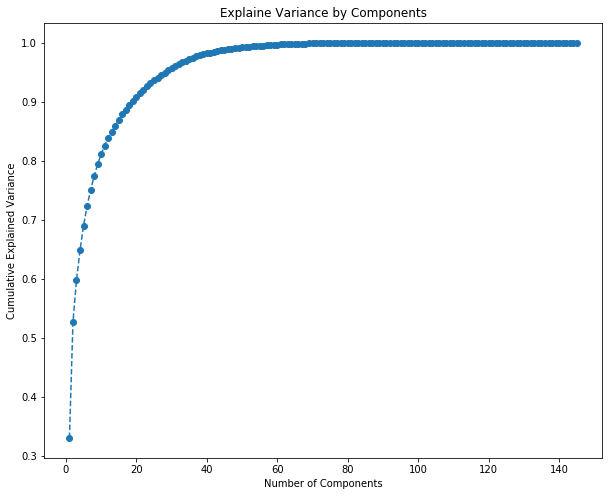

In [16]:
plt.figure(figsize = (10,8))
plt.plot(range(1,146), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explaine Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')

Text(0.5, 0, 'Number of Components')

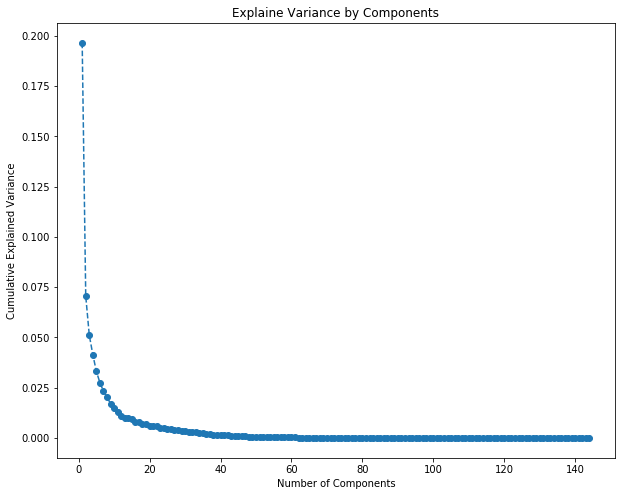

In [17]:
from numpy import diff
plt.figure(figsize = (10,8))
plt.plot(range(1,145), diff(pca.explained_variance_ratio_.cumsum()), marker = 'o', linestyle = '--')
plt.title('Explaine Variance by Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Number of Components')

In [45]:
pca = PCA(n_components = 14)
pca.fit(data_std)

PCA(copy=True, iterated_power='auto', n_components=14, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [46]:
data_pca = pca.transform(data_std)

For n_clusters = 2 The average silhouette_score is : 0.29300649777155063
For n_clusters = 3 The average silhouette_score is : 0.25921282256200706
For n_clusters = 4 The average silhouette_score is : 0.16850665630641432
For n_clusters = 5 The average silhouette_score is : 0.1656793154425682
For n_clusters = 6 The average silhouette_score is : 0.1514561300545406
For n_clusters = 7 The average silhouette_score is : 0.14334133694444057
For n_clusters = 8 The average silhouette_score is : 0.13218143527151446
For n_clusters = 9 The average silhouette_score is : 0.12959436712473493
For n_clusters = 10 The average silhouette_score is : 0.12606574873023868
For n_clusters = 11 The average silhouette_score is : 0.13520308338524226
For n_clusters = 12 The average silhouette_score is : 0.12277858208793747
For n_clusters = 13 The average silhouette_score is : 0.11636493191744048
For n_clusters = 14 The average silhouette_score is : 0.11543709534487656
For n_clusters = 15 The average silhouette_score

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 22 The average silhouette_score is : 0.10350068490972253
For n_clusters = 23 The average silhouette_score is : 0.09984994352478


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 24 The average silhouette_score is : 0.10935528808642883


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 25 The average silhouette_score is : 0.09695367094969336
For n_clusters = 26 The average silhouette_score is : 0.1087048811031856


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 27 The average silhouette_score is : 0.10645423758944823


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 28 The average silhouette_score is : 0.09589312033536514


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 29 The average silhouette_score is : 0.09700844559065577


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 30 The average silhouette_score is : 0.09442176722111371


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 31 The average silhouette_score is : 0.09232440963163786


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 32 The average silhouette_score is : 0.10022102833100896


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 33 The average silhouette_score is : 0.09442329376303385


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 34 The average silhouette_score is : 0.0938692045408261


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 35 The average silhouette_score is : 0.09431208379626077


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 36 The average silhouette_score is : 0.0974175899452127


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 37 The average silhouette_score is : 0.0960771093219579


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 38 The average silhouette_score is : 0.09489673587618158


//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


For n_clusters = 39 The average silhouette_score is : 0.09346869973351755


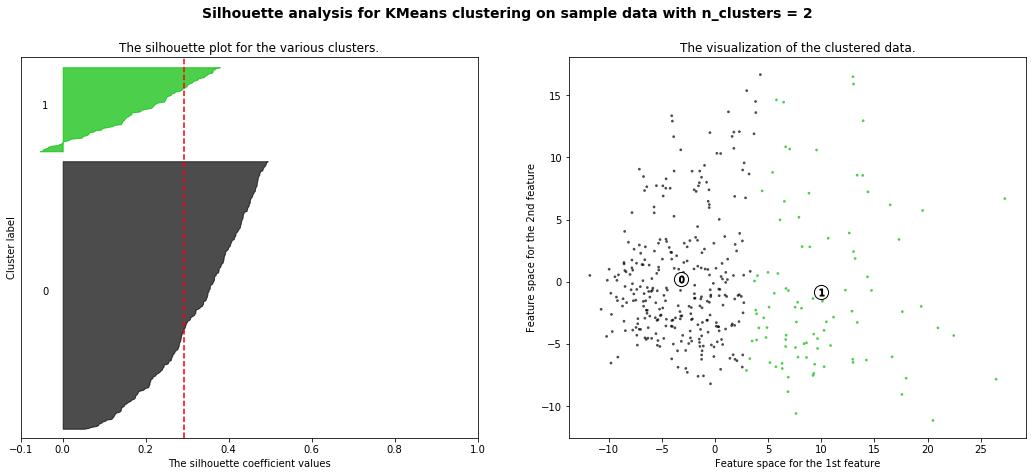

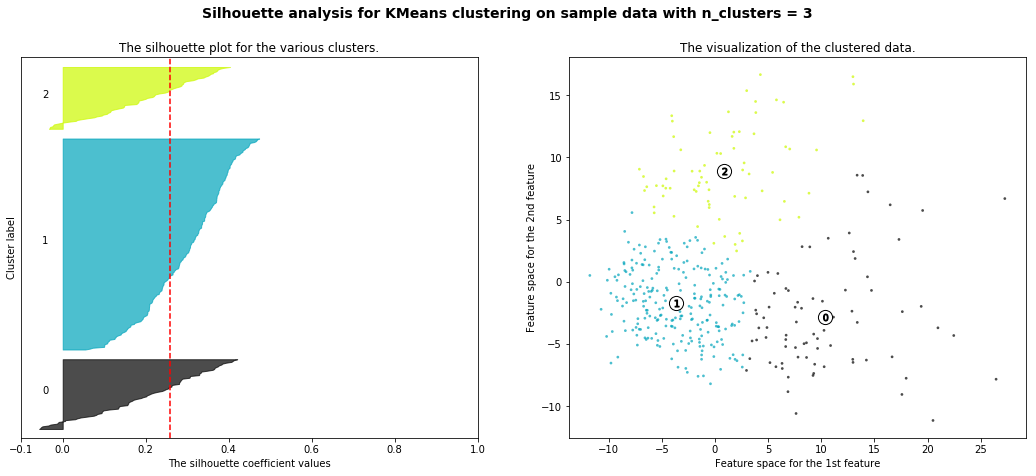

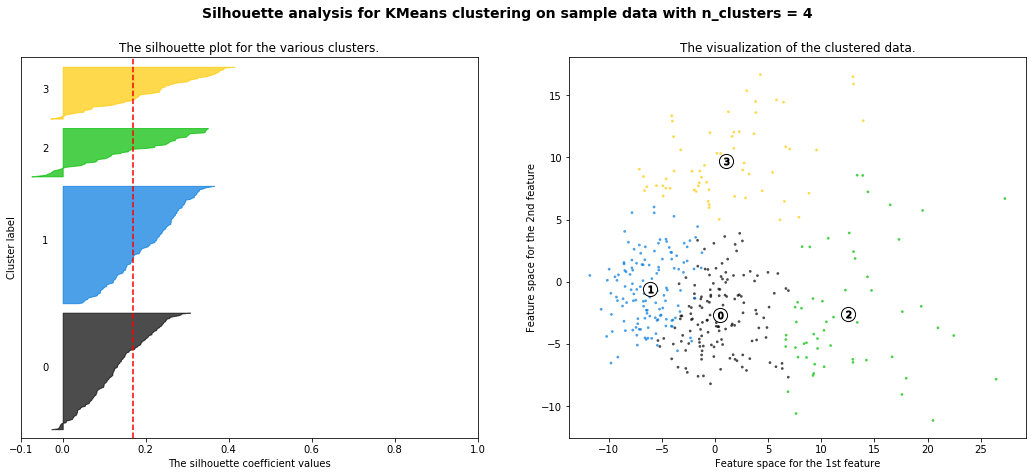

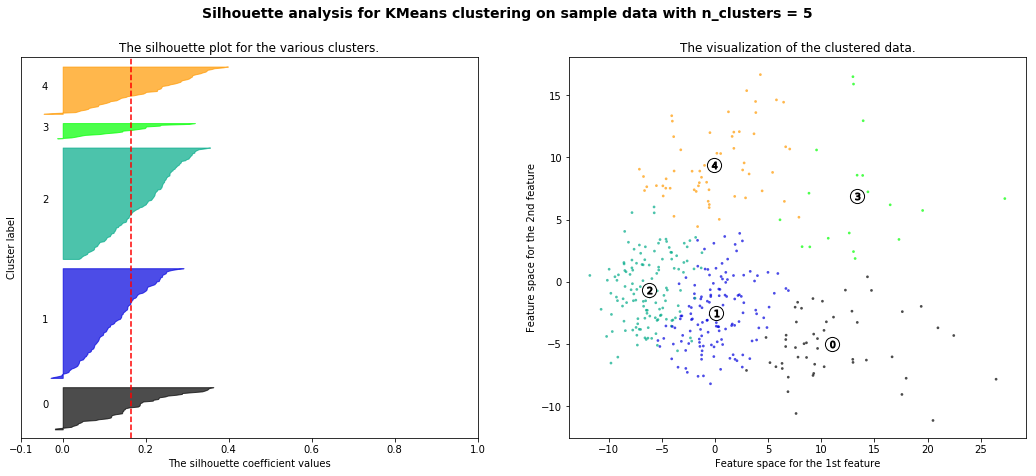

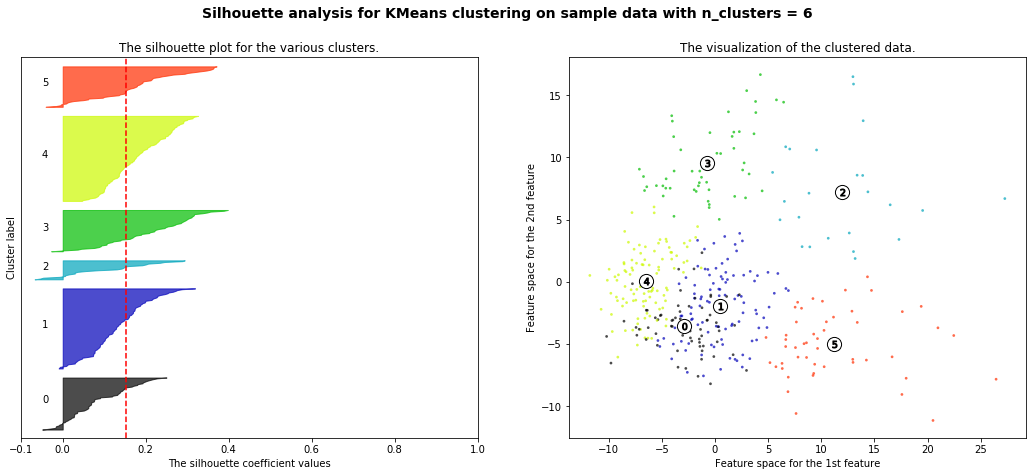

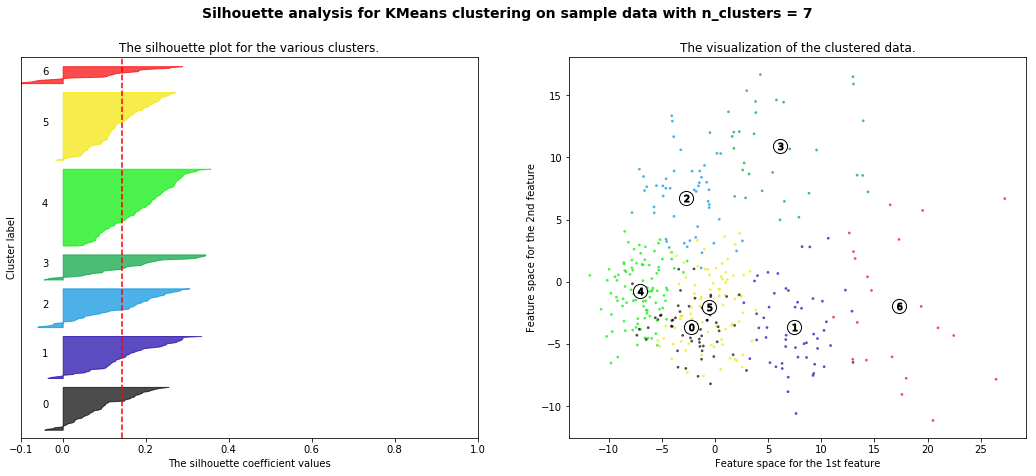

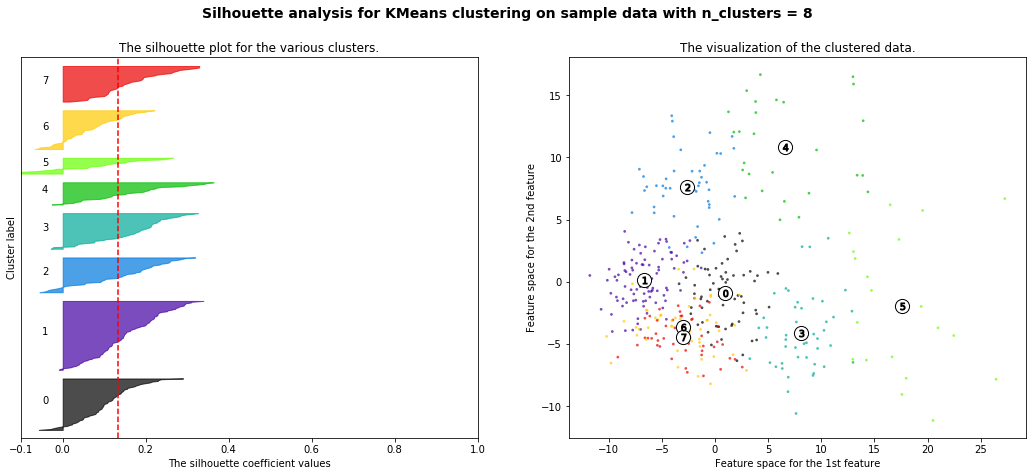

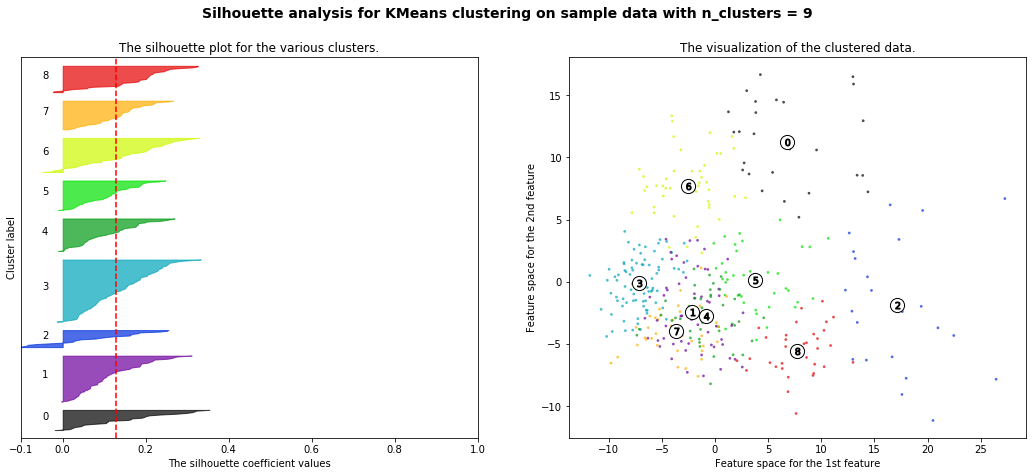

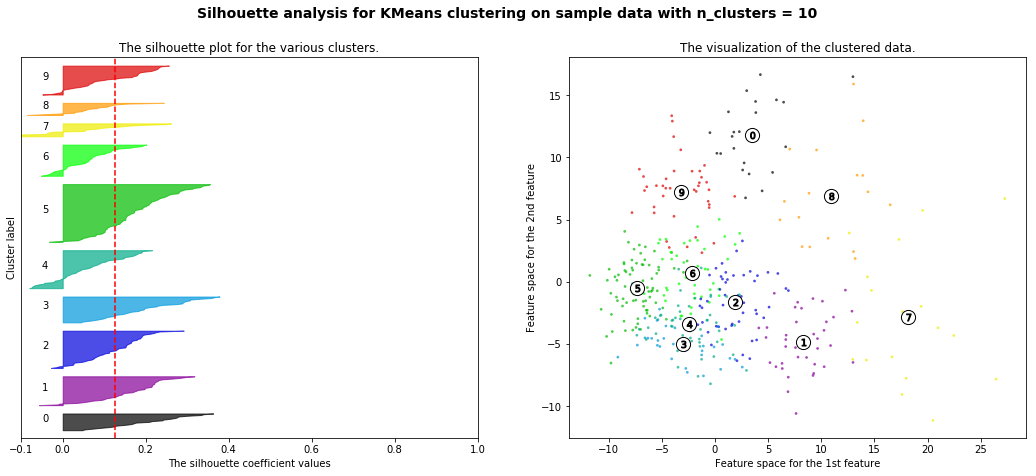

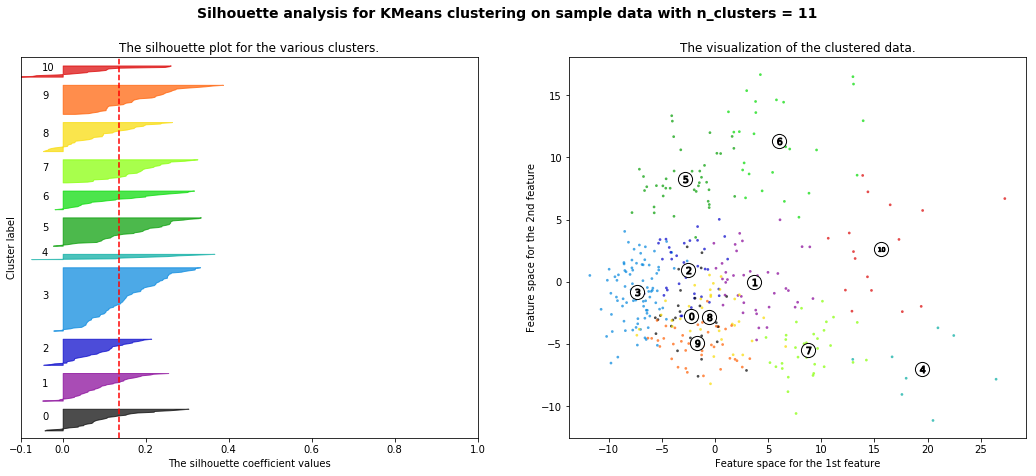

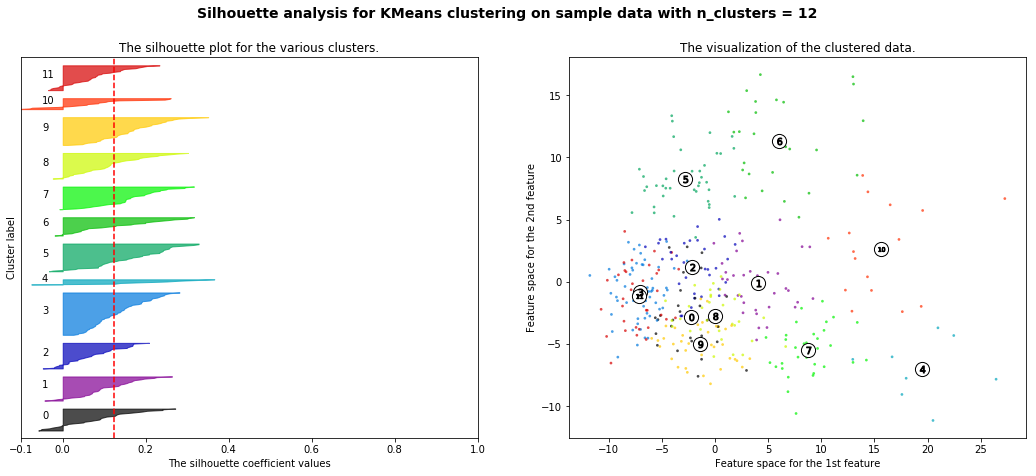

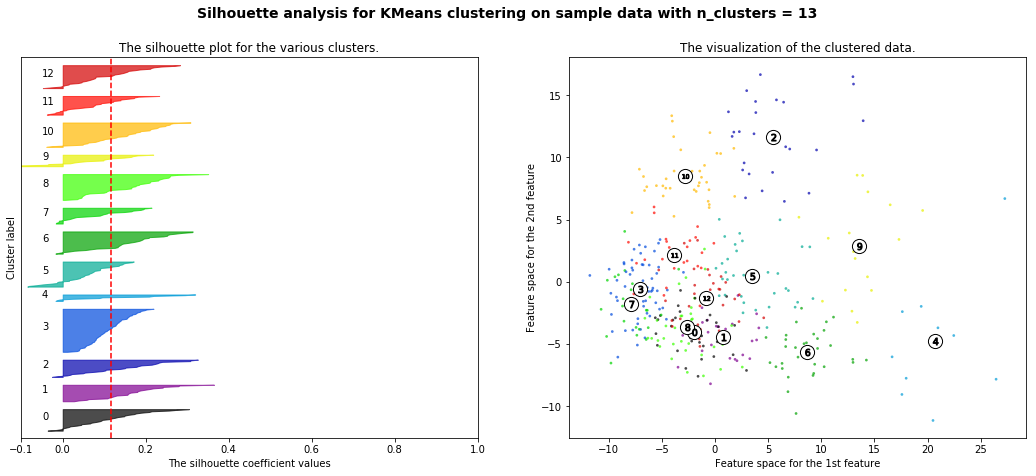

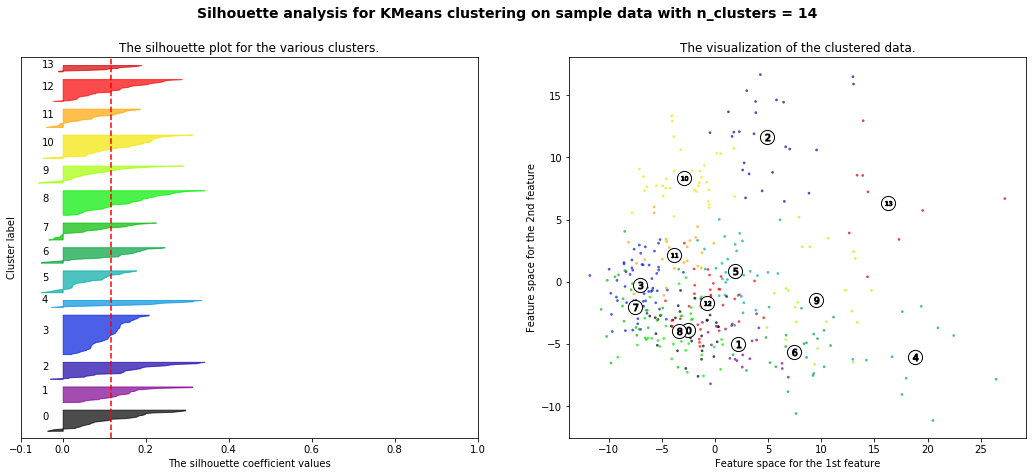

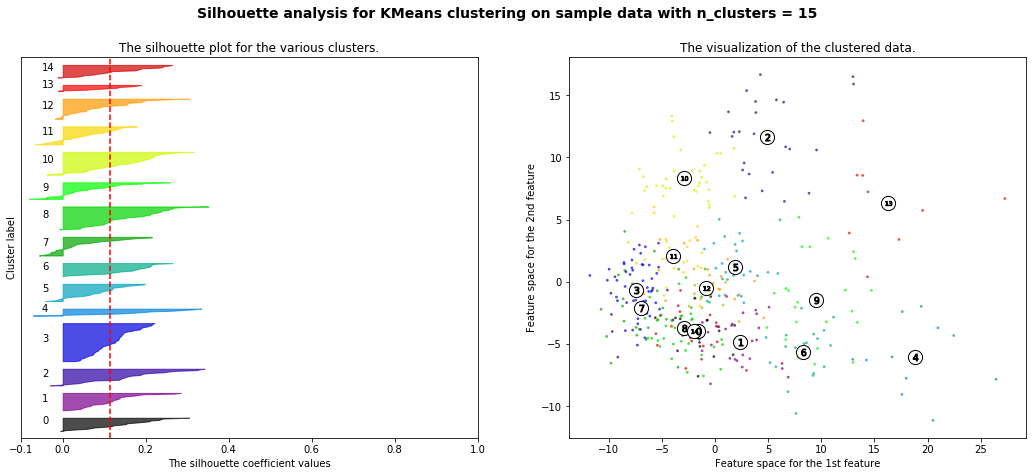

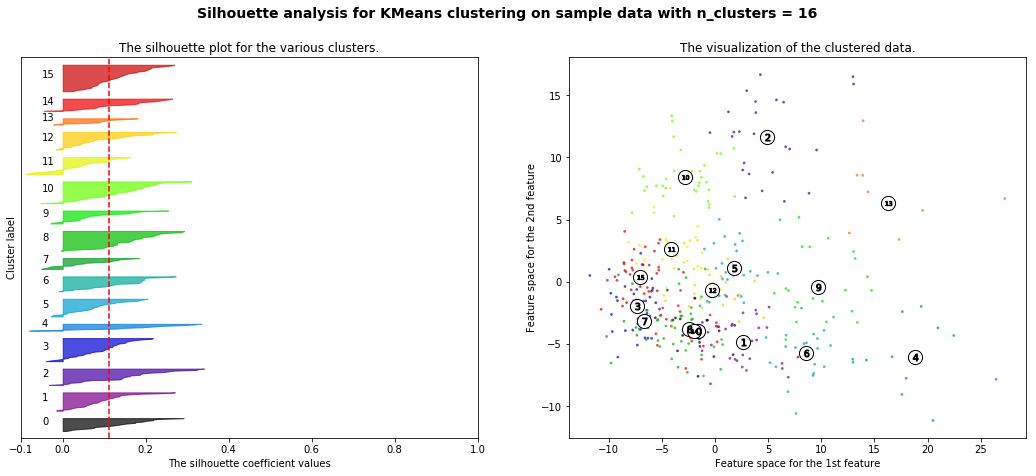

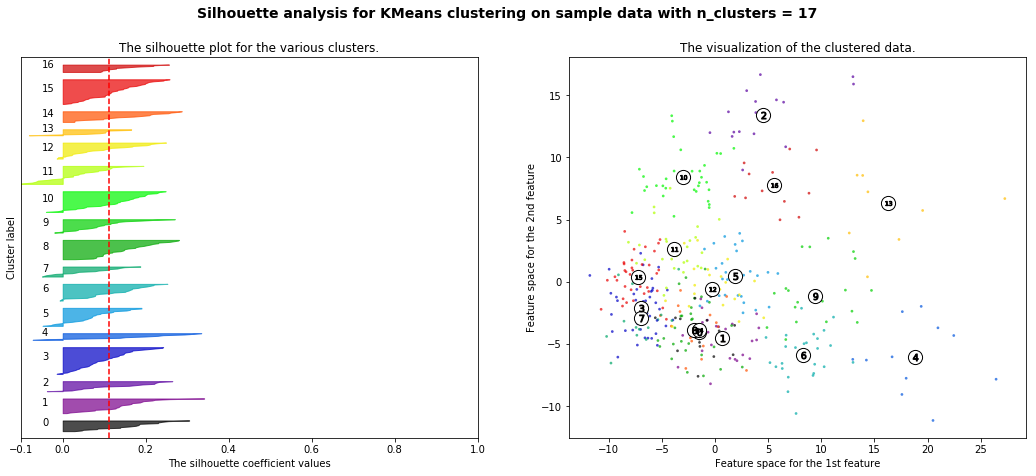

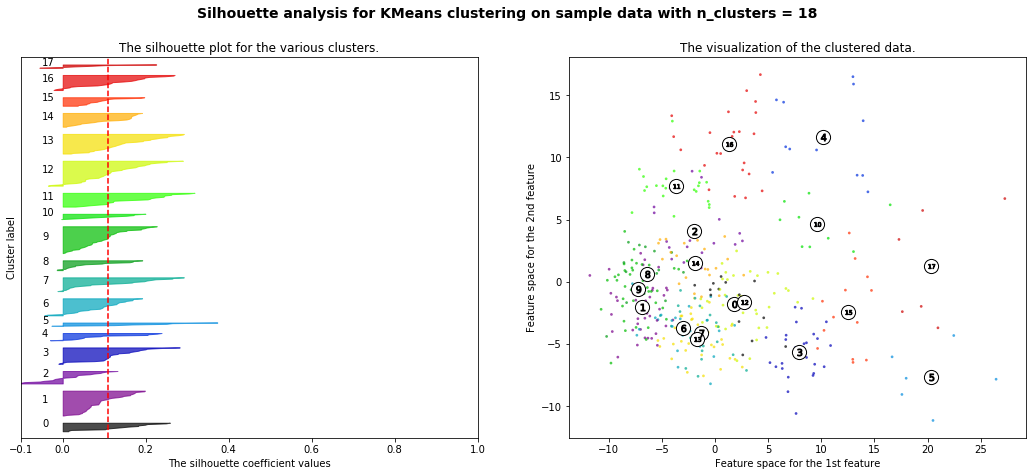

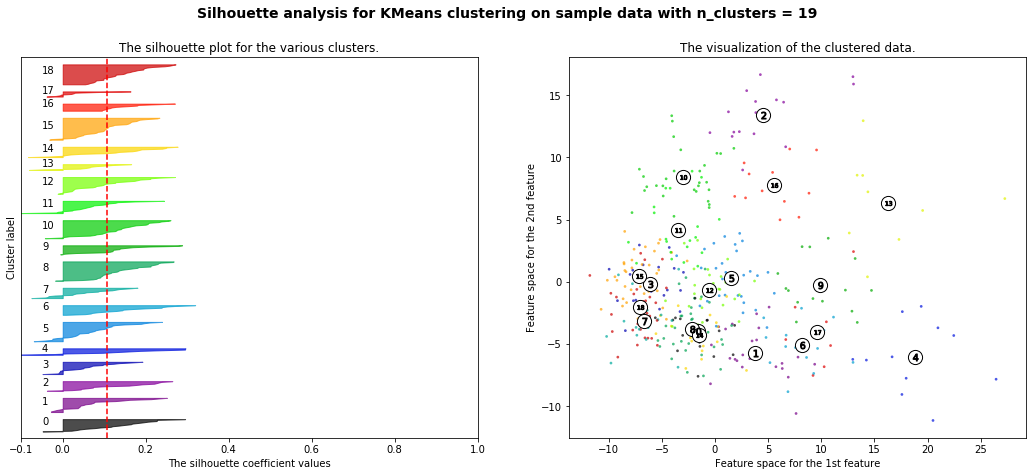

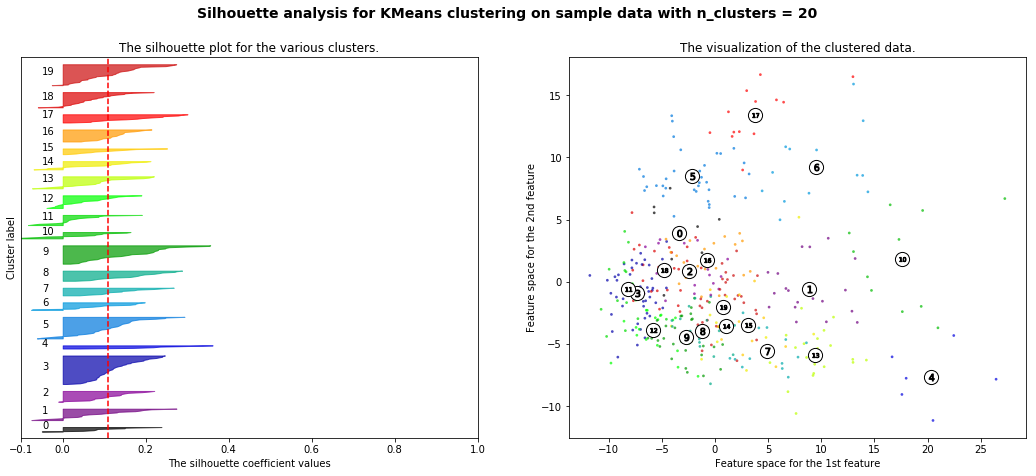

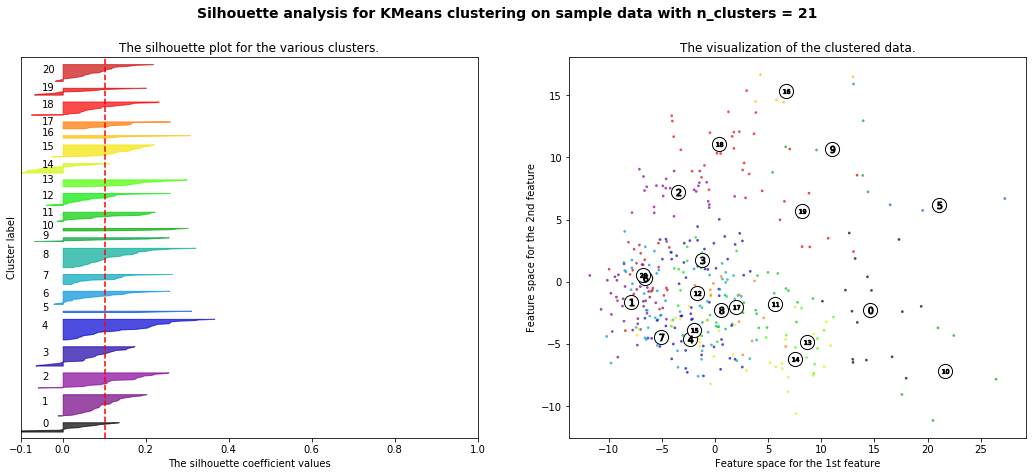

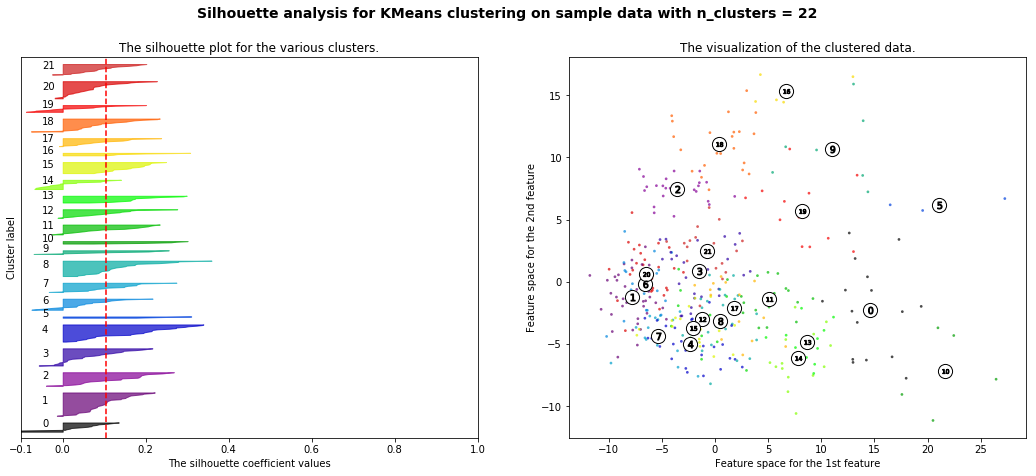

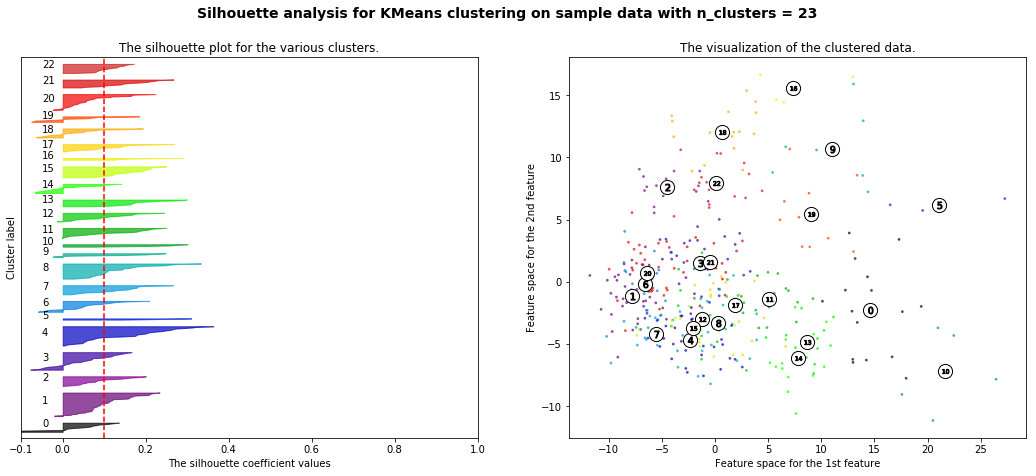

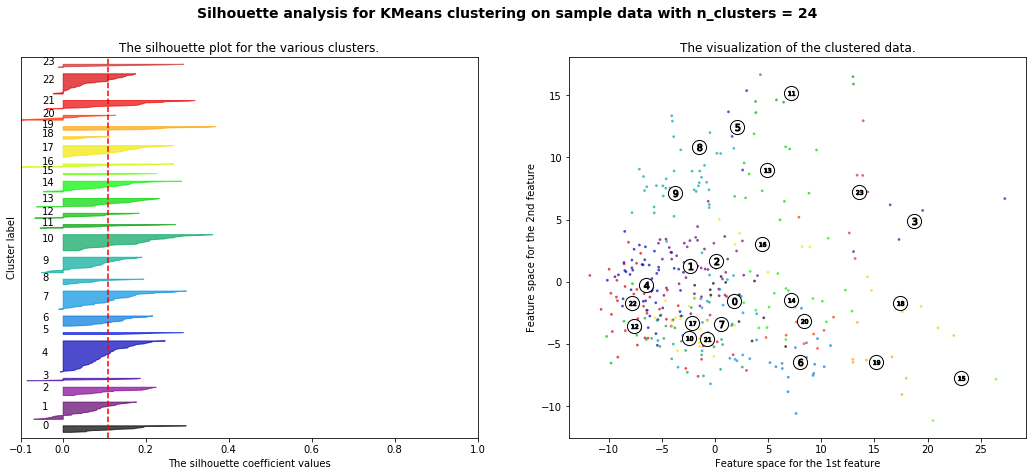

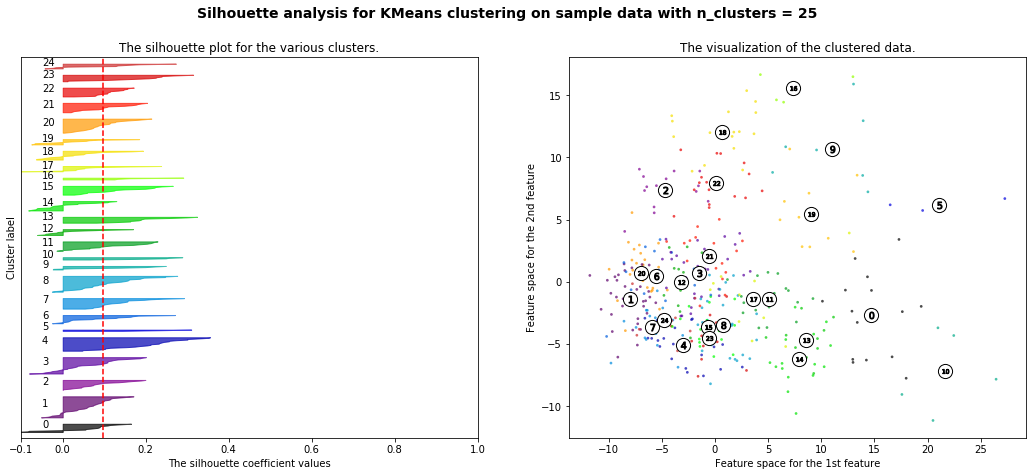

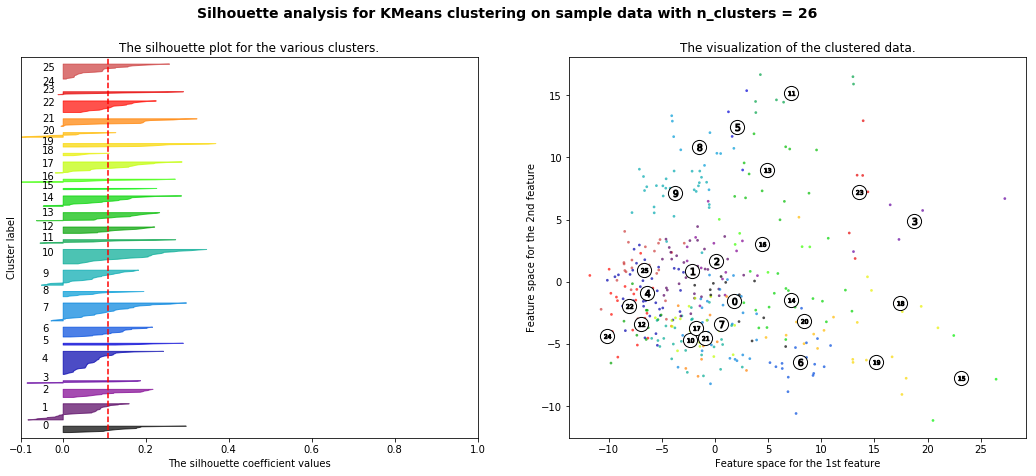

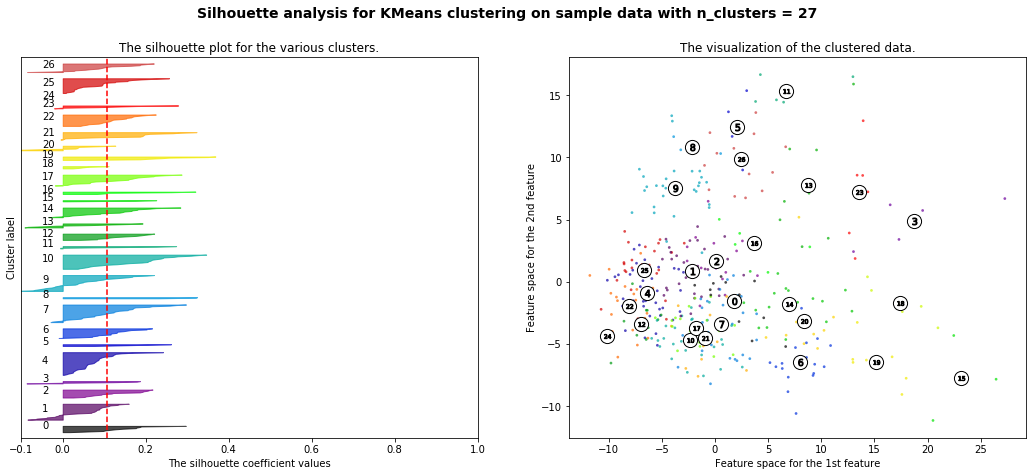

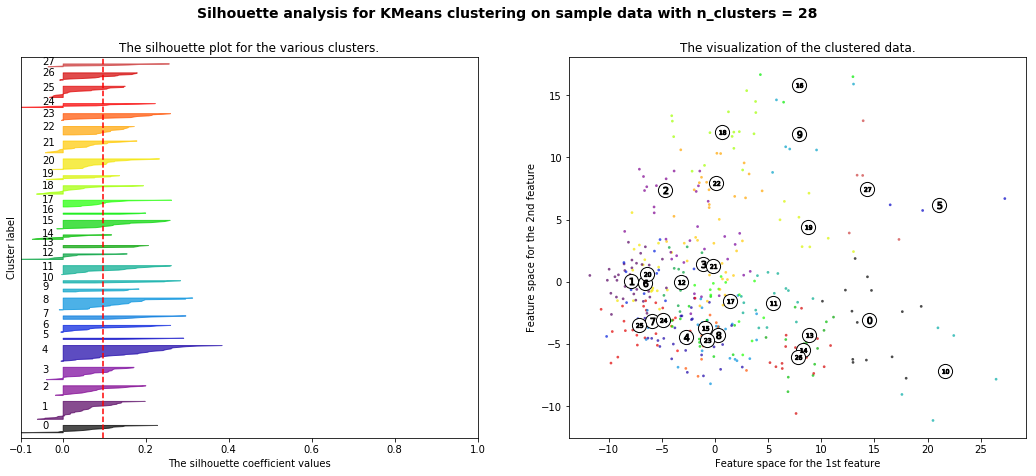

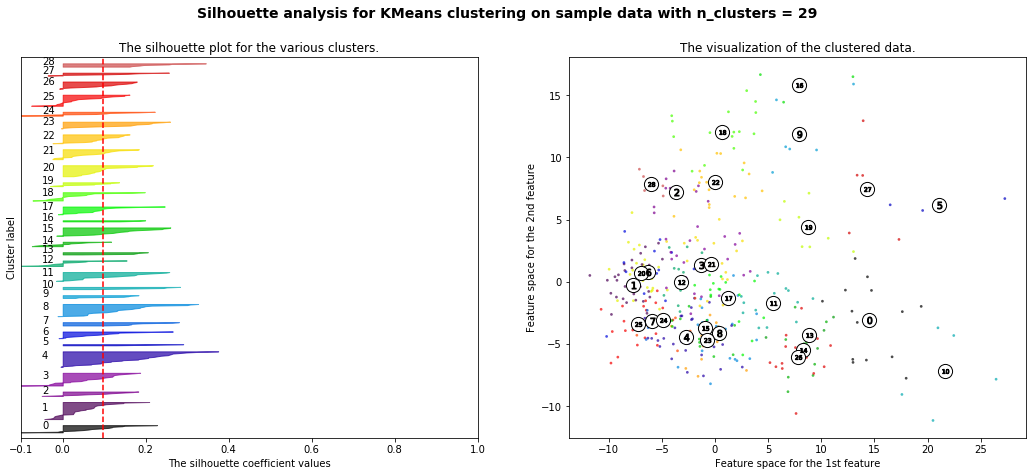

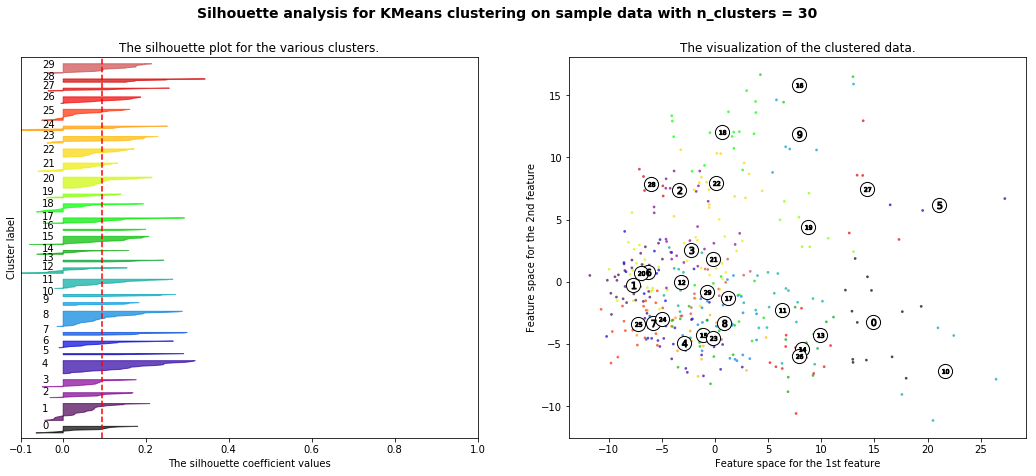

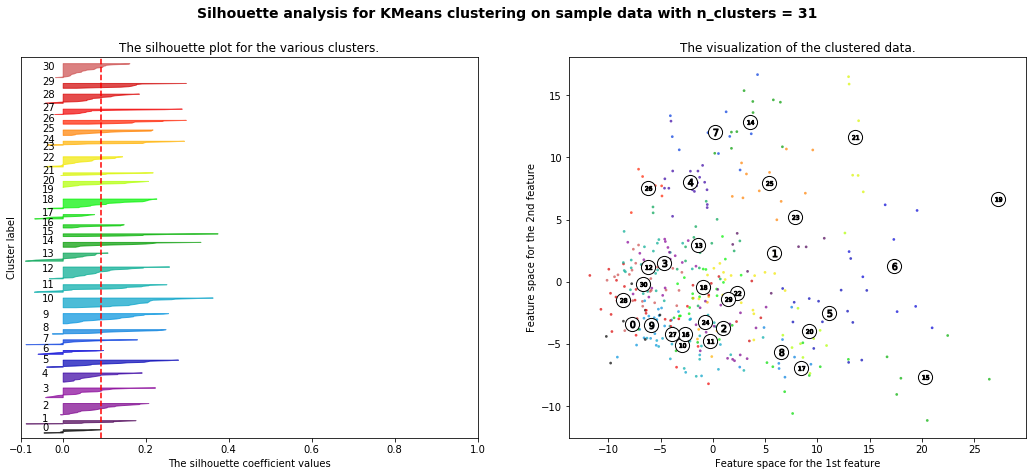

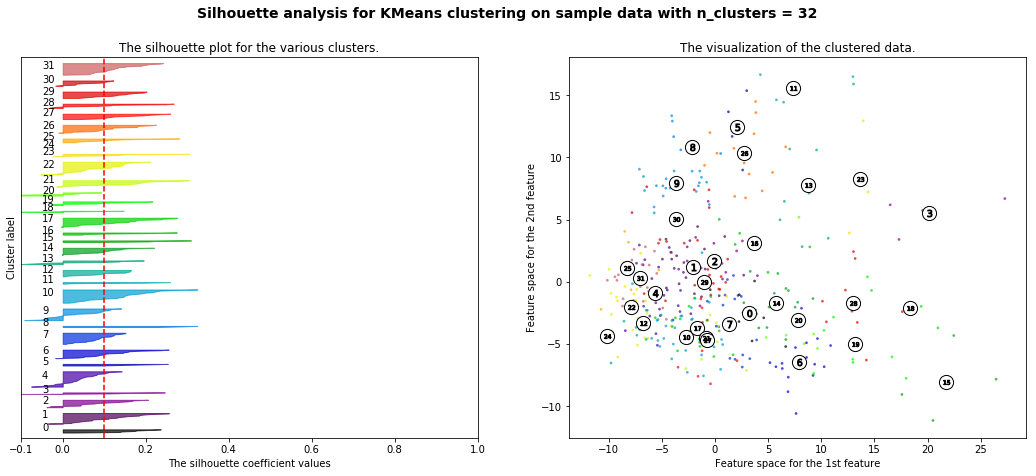

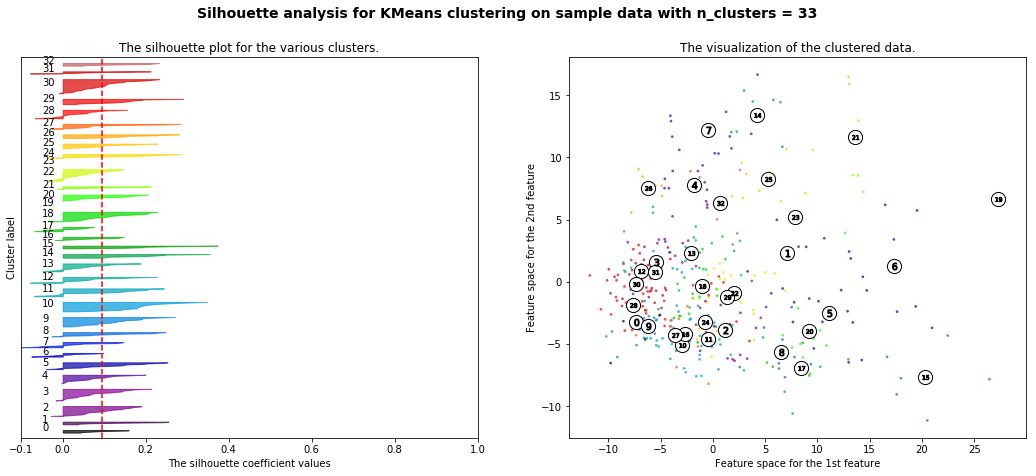

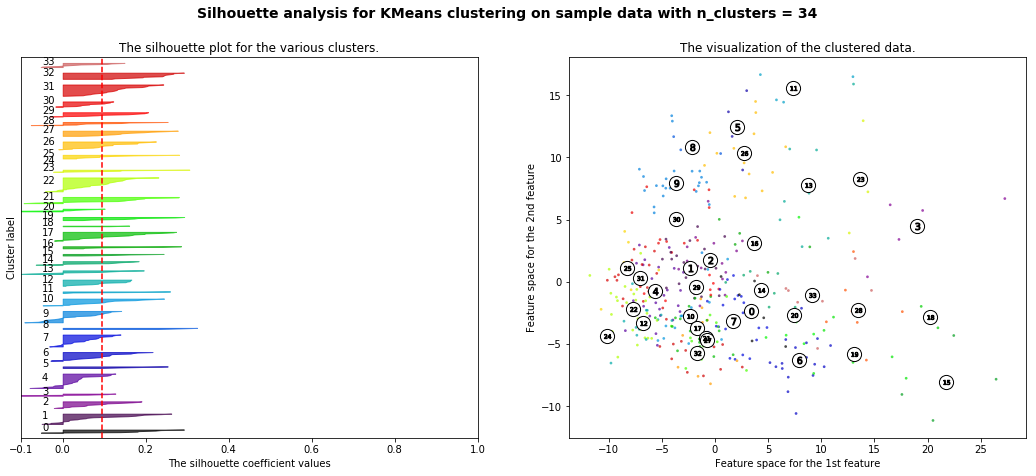

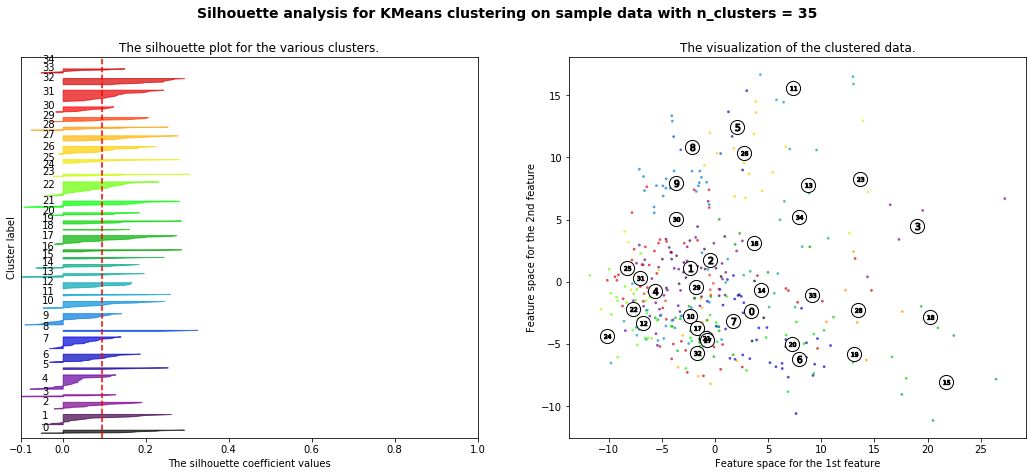

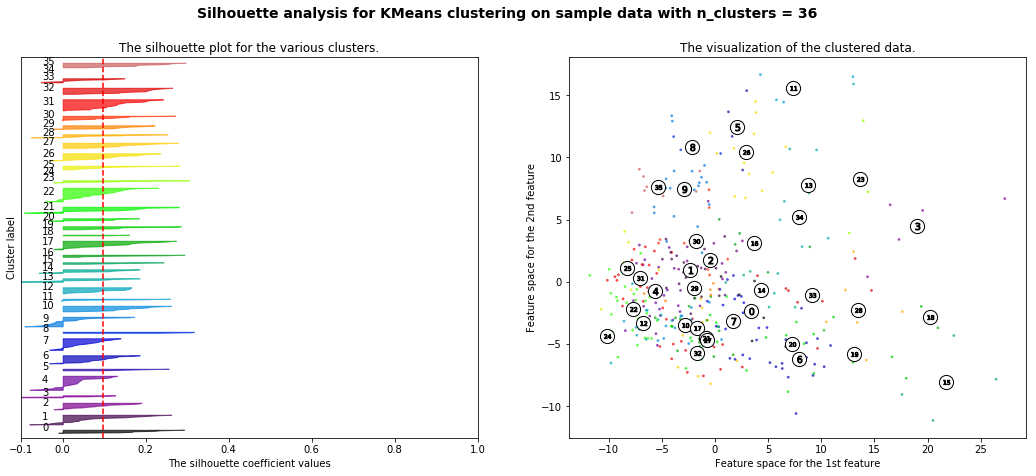

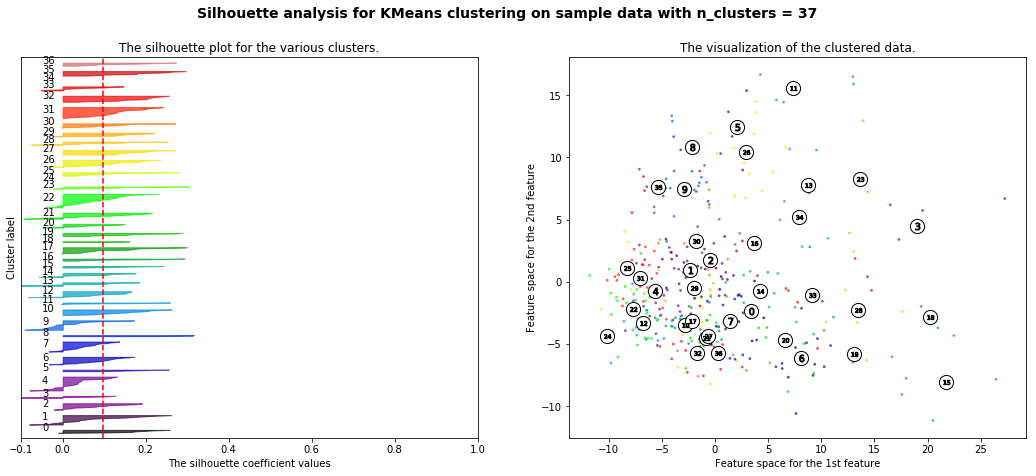

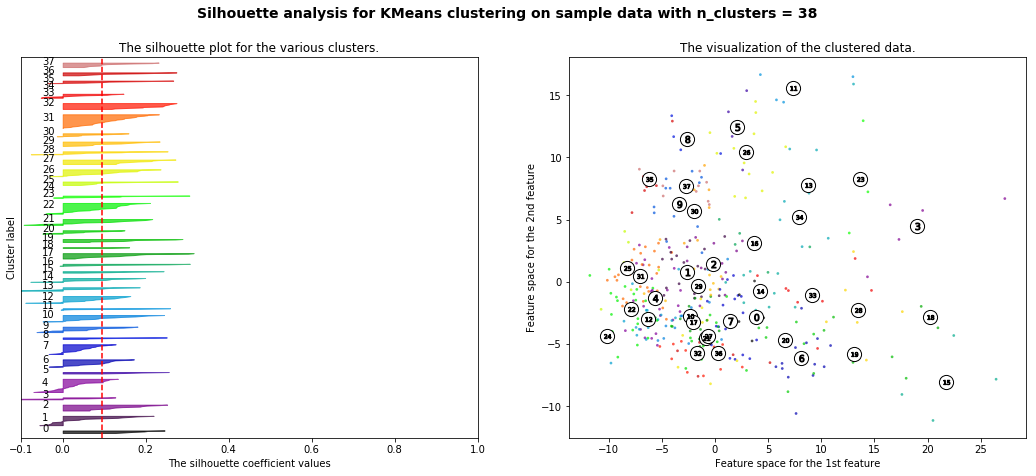

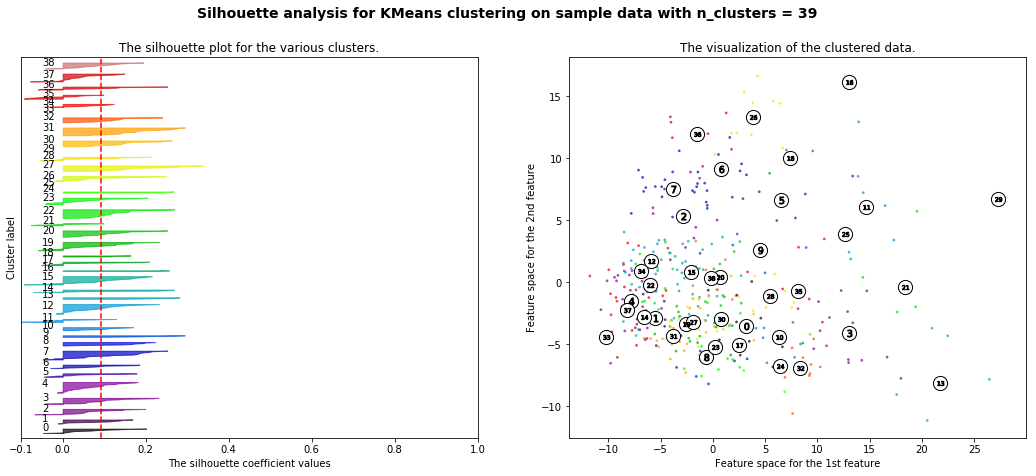

In [107]:
import matplotlib.cm as cm
X = data_pca
clusters = []
for n_clusters in range(2,40):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    clusters.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [73]:
from sklearn import metrics
clusters = []
for i in range(2,52):
    kmeans_pca = KMeans(n_clusters = i, init= 'k-means++', random_state = 4)
    kmeans_pca.fit(data_pca)
    labels = kmeans_pca.labels_
    clusters.append(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))

Text(0.5, 0, 'Number of Clusters')

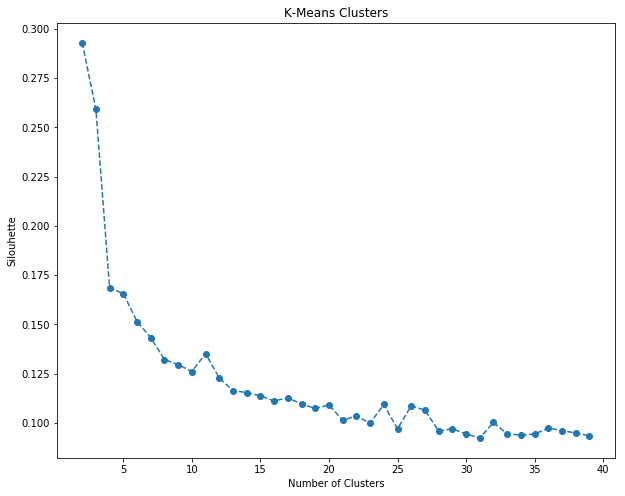

In [108]:
plt.figure(figsize = (10,8))
plt.plot(range(2,40), clusters, marker = 'o', linestyle = '--')
plt.title('K-Means Clusters')
plt.ylabel('Silouhette')
plt.xlabel('Number of Clusters')

In [109]:
silouhette = [0]
for idx, x in enumerate(clusters):
    if idx == 0:
        pass
    else:
        silouhette.append((1 - ((1 - x)/(1-clusters[idx-1]))) * 100)

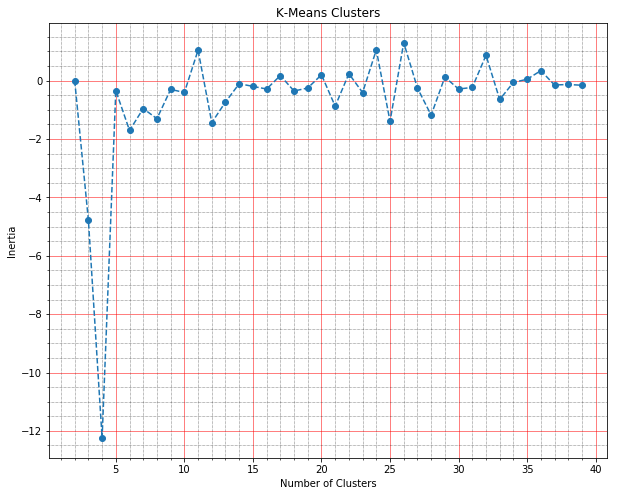

In [111]:
plt.figure(figsize = (10,8))
plt.plot(range(2,40), silouhette, marker = 'o', linestyle = '--')
plt.title('K-Means Clusters')
plt.ylabel('Inertia')
plt.xlabel('Number of Clusters')
plt.minorticks_on()
# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

In [154]:
kmeans_pca = KMeans(n_clusters = 24, random_state = 10)
clusters = kmeans_pca.fit(data_pca)

In [155]:
y_hat = clusters.predict(data_pca)

In [156]:
from sklearn import metrics
labels = clusters.labels_
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.10935528808642883

34.453727069112524

In [269]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [270]:
finalDf

PC1       PC2  target
0    1.900057  3.012211       5
1    0.362343 -0.573943       5
2    8.140649 -2.118038       6
3   -2.354755  3.318730       5
4   -0.521371 -1.640142       5
..        ...       ...     ...
386 -8.486571  4.058476       0
387 -4.049713 -3.104312       3
388  3.212252  8.673182       7
389 -2.613974  1.683516       5
390 -0.980778  9.362718       2

[391 rows x 3 columns]

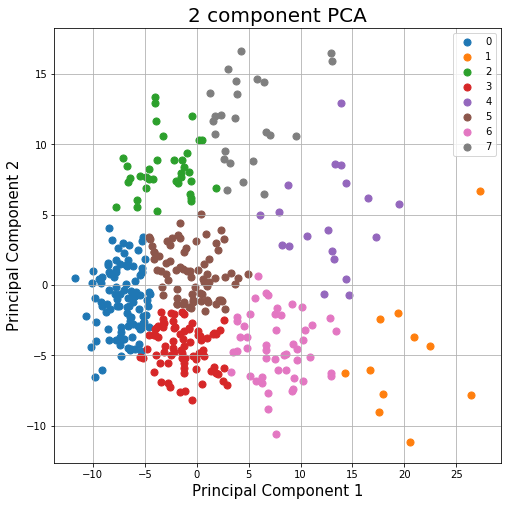

In [271]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1, 2, 3, 4, 5, 6, 7]
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [150]:
all_individuals_with_targets = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
all_individuals_with_targets.rename(columns = {0: 'target'}, inplace = True)

In [151]:
all_individuals_with_targets.head()

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  ThreeMade/G  \
0       Brook Lopez   31  61  60  26.6       4.0    9.4   0.427          1.4   
1  Donte DiVincenzo   23  59  22  23.1       3.5    7.7   0.462          1.3   
2      Eric Bledsoe   30  56  56  27.2       5.7   11.8   0.482          1.3   
3    Ersan İlyasova   32  56   8  16.0       2.4    5.2   0.472          0.8   
4       George Hill   33  52   0  21.2       3.4    6.5   0.530          1.4   

   ThreeA/G  ...  Ht  Exp  Team        VI      PAWS  NSPTotal      NSP/G  \
0       4.7  ...  84   11   MIL  4.294458  0.075921     438.4   7.186885   
1       3.7  ...  76    1   MIL  4.731701  0.048664     346.2   5.867797   
2       3.6  ...  73    9   MIL  7.259234  0.095200     560.2  10.003571   
3       2.2  ...  81   11   MIL  2.987205  0.051600     216.0   3.857143   
4       2.9  ...  75   11   MIL  4.371161  0.084535     240.2   4.619231   

     SL        AV  target  
0  3.75  7.270233      16  
1  9.75  6.783603       1  
2  4.50  8.372552       6  
3  3.00  5.356493       1  
4  2.25  5.973797      10  

[5 rows x 148 columns]

# test stuff

In [171]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

km = KMeans(n_clusters = 24, random_state = 10)

sfs1 = SFS(km, 
           k_features=14, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)

sfs1 = sfs1.fit(data_std, y_hat)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/envs/learn-env/lib/python3.6/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:37: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  selector.est_.fit(X[:, indices], y, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
//anaconda3/envs/learn-env/lib/python3.6/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:37: ConvergenceWarning: Number of distinct clusters (22) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  selector.est_.fit(X[:, indices], y, **fit_params)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:37: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (24). Possibly due to duplicate points in X.
  se

In [177]:
features = [all_individuals.columns[5], all_individuals.columns[34], 
 all_individuals.columns[37], all_individuals.columns[49],
 all_individuals.columns[71], all_individuals.columns[83],
 all_individuals.columns[89], all_individuals.columns[92],
 all_individuals.columns[100], all_individuals.columns[104],
 all_individuals.columns[120], all_individuals.columns[121],
 all_individuals.columns[129], all_individuals.columns[136]]

test = all_individuals.drop([elem for elem in all_individuals.columns if elem not in features], axis = 1)

In [185]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_std = scaler.fit_transform(test)

pca = PCA(n_components = 2)
pca.fit(data_std)
data_pca = pca.transform(data_std)

In [186]:
clusters = []
for i in range(20,45):
    gaussian_pca = GaussianMixture(n_components = i, random_state = 10)
    gaussian_pca.fit(data_pca)
    y_hat = gaussian_pca.predict(data_pca)
    labels = pd.Series(y_hat)
    clusters.append(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))

In [187]:
clusters

[0.24768083251907844,
 0.27170017842255084,
 0.2511478838473684,
 0.2599516784621678,
 0.27930637464043584,
 0.31251455916862714,
 0.30597109547356915,
 0.2613573315267561,
 0.28547839705078926,
 0.2866819463645558,
 0.26914245737637293,
 0.2540368725643441,
 0.3327185337569724,
 0.31078835252714826,
 0.31232459164835746,
 0.3162143970789202,
 0.30810699505788264,
 0.3068971034519597,
 0.31684870880962446,
 0.31513871558157647,
 0.30822367928100175,
 0.3099192283288874,
 0.31270146442810604,
 0.30319096196348044,
 0.30275210240325157]

In [188]:
gaussian_pca = GaussianMixture(n_components=32, random_state = 10)
clusters = gaussian_pca.fit(data_pca)
y_hat = clusters.predict(data_pca)
from sklearn import metrics
labels = pd.Series(y_hat)
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.3327185337569724

282.3913880179298

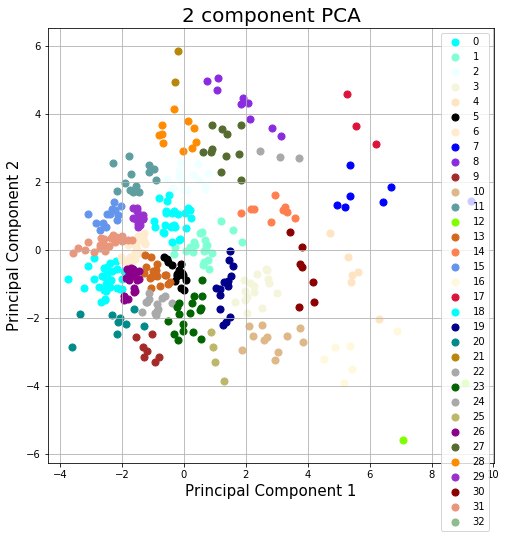

In [190]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

import matplotlib.colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(0,33))
colors = list(colors.keys())[10:43]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [191]:
finalDf = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [229]:
finalDf[finalDf.target == 13]

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  \
4         George Hill   33  52   0  21.2       3.4    6.5   0.530   
23      Terence Davis   22  64   2  17.0       2.8    6.1   0.463   
32       Marcus Smart   25  53  39  32.5       4.5   11.9   0.380   
110         Ish Smith   31  60  19  26.2       4.4    9.7   0.451   
125        Malik Monk   21  55   1  21.3       3.9    8.9   0.434   
154        Kevin Knox   20  65   4  17.9       2.2    6.2   0.359   
170   Markieff Morris   30  44  16  22.5       4.0    8.8   0.450   
188       Jeff Teague   31  25   4  20.8       2.7    6.6   0.412   
190     Kevin Huerter   21  56  48  31.4       4.5   10.9   0.413   
228       Gary Harris   25  56  55  31.8       3.9    9.3   0.420   
235      Monte Morris   24  65   8  21.6       3.4    7.4   0.459   
245        Joe Ingles   32  64  37  29.9       3.4    7.7   0.441   
264      Danuel House   26  58  47  30.0       3.6    8.3   0.427   
276     Jalen Brunson   23  57  16  17.9       3.2    6.8   0.466   
290       Jae Crowder   29  45  45  29.4       3.3    8.9   0.368   
296        Tyus Jones   23  65   6  19.0       3.0    6.6   0.459   
367  Juan Hernangómez   24  14  14  29.4       4.4    9.8   0.453   

     ThreeMade/G  ThreeA/G  ...  Ht  Exp  Team        VI      PAWS  NSPTotal  \
4            1.4       2.9  ...  75   11   MIL  4.371161  0.084535     240.2   
23           1.4       3.5  ...  76    0   TOR  3.543830  0.030618     295.8   
32           2.4       6.9  ...  75    5   BOS  6.267864  0.056841     531.8   
110          0.9       2.5  ...  72    9   WAS  5.443274  0.027193     424.0   
125          1.1       3.7  ...  75    2   CHO  3.973301  0.010561     393.0   
154          1.0       3.1  ...  79    1   NYK  2.526544  0.001723     342.4   
170          1.7       4.3  ...  80    8   DET  4.094420  0.022739     315.6   
188          0.4       1.2  ...  75   10   ATL  4.076847  0.009100     158.2   
190          2.3       6.0  ...  79    1   ATL  5.749663  0.017309     470.6   
228          1.3       3.8  ...  76    5   DEN  3.986119  0.032834     397.8   
235          0.8       2.2  ...  74    2   DEN  3.683540  0.052650     331.8   
245          1.9       4.8  ...  79    5   UTA  5.885226  0.037674     433.6   
264          1.9       5.4  ...  78    3   HOU  3.818835  0.036000     359.0   
276          0.8       2.1  ...  73    1   DAL  4.019571  0.038664     303.0   
290          1.7       5.9  ...  78    7   MEM  5.559832  0.030405     344.0   
296          0.7       1.9  ...  72    4   MEM  3.734807  0.045521     310.2   
367          2.1       4.9  ...  81    3   MIN  4.965374  0.036015     107.4   

         NSP/G     SL        AV  target  
4     4.619231   2.25  5.973797      13  
23    4.621875  10.50  5.635245      13  
32   10.033962   8.25  7.068831      13  
110   7.066667   3.75  6.885921      13  
125   7.145455  11.25  5.072818      13  
154   5.267692  12.00  4.082250      13  
170   7.172727   4.50  4.752985      13  
188   6.328000   3.75  2.803221      13  
190   8.403571  11.25  6.804107      13  
228   7.103571   8.25  5.584247      13  
235   5.104615   9.00  6.073401      13  
245   6.775000   3.00  7.549117      13  
264   6.189655   7.50  6.278019      13  
276   5.315789   9.75  5.237676      13  
290   7.644444   5.25  5.657054      13  
296   4.772308   9.75  6.023668      13  
367   7.671429   9.00  2.645651      13  

[17 rows x 148 columns]

In [228]:
finalDf[finalDf.Name == 'Marcus Smart']

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  ThreeMade/G  \
32  Marcus Smart   25  53  39  32.5       4.5   11.9    0.38          2.4   

    ThreeA/G  ...  Ht  Exp  Team        VI      PAWS  NSPTotal      NSP/G  \
32       6.9  ...  75    5   BOS  6.267864  0.056841     531.8  10.033962   

      SL        AV  target  
32  8.25  7.068831      13  

[1 rows x 148 columns]

# Actual Gaussian

In [152]:
from sklearn.mixture import GaussianMixture

In [275]:
clusters = []
for i in range(20,45):
    gaussian_pca = GaussianMixture(n_components = i, random_state = 42)
    gaussian_pca.fit(data_pca)
    y_hat = gaussian_pca.predict(data_pca)
    labels = pd.Series(y_hat)
    clusters.append(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))

In [276]:
clusters

[0.2644132467486647,
 0.3162212554528039,
 0.2308510301921902,
 0.28547430033126553,
 0.29191489103085616,
 0.288277347733465,
 0.2563442551280799,
 0.3174189085821483,
 0.3098247811233865,
 0.306331731267314,
 0.3121767491925896,
 0.31030690623039486,
 0.31718818122801595,
 0.33749198521426266,
 0.32624920893938836,
 0.3277434768383609,
 0.2898509446288899,
 0.28932753308227194,
 0.289943160631511,
 0.29468952678748817,
 0.25621171902145473,
 0.2557058816035556,
 0.2799496461813365,
 0.28070746024725507,
 0.2879915038184925]

In [277]:
gaussian_pca = GaussianMixture(n_components=33, random_state = 42)
clusters = gaussian_pca.fit(data_pca)

In [278]:
y_hat = clusters.predict(data_pca)
from sklearn import metrics
labels = pd.Series(y_hat)
display(metrics.silhouette_score(data_pca, labels, metric = 'euclidean'))
metrics.calinski_harabasz_score(data_pca, labels)

0.33749198521426266

308.5337390966651

In [279]:
principalDf = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

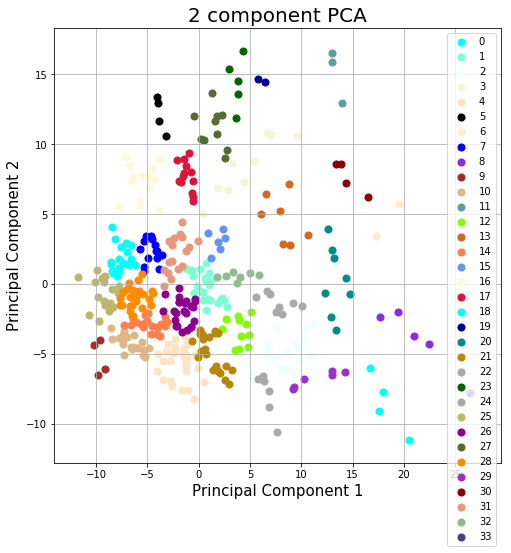

In [280]:
import matplotlib.colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(range(0,34))
colors = list(colors.keys())[10:44]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [281]:
finalDf = pd.concat([all_individuals, pd.Series(y_hat)], axis = 1)
finalDf.rename(columns = {0: 'target'}, inplace = True)

In [282]:
finalDf[finalDf.target == 8]

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  \
215       LeBron James   35  60  60  34.9       9.8   19.6   0.498   
219      Kawhi Leonard   28  51  51  32.2       9.3   19.9   0.469   
266       James Harden   30  61  61  36.7       9.9   22.7   0.435   
270  Russell Westbrook   31  53  53  35.9      10.7   22.6   0.474   
279        Luka Dončić   20  54  54  33.3       9.5   20.6   0.461   

     ThreeMade/G  ThreeA/G  ...  Ht  Exp  Team         VI      PAWS  NSPTotal  \
215          2.2       6.4  ...  81   16   LAL  12.910866  0.090347     966.2   
219          2.1       5.7  ...  79    8   LAC   9.939130  0.093823     820.0   
266          4.4      12.6  ...  77   10   HOU  11.766755  0.103028    1343.6   
270          1.0       3.8  ...  75   11   HOU  11.548004  0.081523    1005.4   
279          2.9       9.1  ...  79    1   DAL  13.242237  0.120817    1022.4   

         NSP/G     SL         AV  target  
215  16.103333   0.75  13.290745       8  
219  16.078431   6.00  10.904589       8  
266  22.026230   4.50  13.903621       8  
270  18.969811   3.75  10.974565       8  
279  18.933333  12.00  12.283173       8  

[5 rows x 148 columns]

In [265]:
finalDf[finalDf.Name == 'LeBron James']

Name  Age   G  GS  MP/G  FGMade/G  FGA/G  FGPerc  ThreeMade/G  \
215  LeBron James   35  60  60  34.9       9.8   19.6   0.498          2.2   

     ThreeA/G  ...  Ht  Exp  Team         VI      PAWS  NSPTotal      NSP/G  \
215       6.4  ...  81   16   LAL  12.910866  0.090347     966.2  16.103333   

       SL         AV  target  
215  0.75  13.290745       8  

[1 rows x 148 columns]